# **ÖDEV-3**

1- Persona.csv verisini kullanarak EDA (Exploratory data analysis) yapın.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

df = pd.read_csv("persona.csv")
df.head()

,PRICE,SOURCE,SEX,COUNTRY,AGE
0,39,android,male,bra,17
1,39,android,male,bra,17
2,49,android,male,bra,17
3,29,android,male,tur,17
4,49,android,male,tur,17


In [7]:
df.tail()

,PRICE,SOURCE,SEX,COUNTRY,AGE
4995,29,android,female,bra,31
4996,29,android,female,bra,31
4997,29,android,female,bra,31
4998,39,android,female,bra,31
4999,29,android,female,bra,31


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   PRICE    5000 non-null   int64 
 1   SOURCE   5000 non-null   object
 2   SEX      5000 non-null   object
 3   COUNTRY  5000 non-null   object
 4   AGE      5000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 234.4+ KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PRICE,5000.0,34.1320,12.464897,9.0,29.0,39.0,39.0,59.0
AGE,5000.0,23.5814,8.995908,15.0,17.0,21.0,27.0,66.0


In [12]:
df.isnull( ).sum( )

PRICE      0
SOURCE     0
SEX        0
COUNTRY    0
AGE        0
dtype: int64

In [13]:
df.nunique( )

PRICE       6
SOURCE      2
SEX         2
COUNTRY     6
AGE        46
dtype: int64

In [14]:
df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            4990, 4991, 4992, 4993, 4994, 4995, 4996, 4997, 4998, 4999],
           dtype='int64', length=5000)

In [15]:
df.columns

Index(['PRICE', 'SOURCE', 'SEX', 'COUNTRY', 'AGE'], dtype='object')

In [18]:
df.shape

(5000, 5)

2-Persona.csv verisini kullanarak Kategorik ve Numerik Değişkenleri belirleyin.

In [5]:
num_cols = [col for col in df.columns if df[col].dtypes != 'O']
num_cols

['PRICE', 'AGE']

In [6]:
cat_cols = [col for col in df.columns if df[col].dtypes == "O"]
cat_cols

['SOURCE', 'SEX', 'COUNTRY']

In [7]:
num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes != "O"]
num_but_cat

['PRICE']

In [8]:
cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and df[col].dtypes == "O"]
cat_but_car

[]

In [9]:
cat_cols = cat_cols + num_but_cat
cat_cols

['SOURCE', 'SEX', 'COUNTRY', 'PRICE']

In [10]:
cat_cols = [col for col in cat_cols if col not in cat_but_car]
cat_cols

['SOURCE', 'SEX', 'COUNTRY', 'PRICE']

In [11]:
num_cols = [col for col in num_cols if col not in cat_cols]
num_cols

['AGE']

In [12]:
cat_cols

['SOURCE', 'SEX', 'COUNTRY', 'PRICE']

In [13]:
num_cols

['AGE']

3-Persona.csv verisini kullanarak Kategorik ve Numerik Değişkenleri analiz edin. Yorumda bulunun.

In [18]:
def cat_summary(dataframe, col_name, plot=False):

    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()
        
        

         SOURCE  Ratio
android    2974  59.48
ios        2026  40.52
##########################################


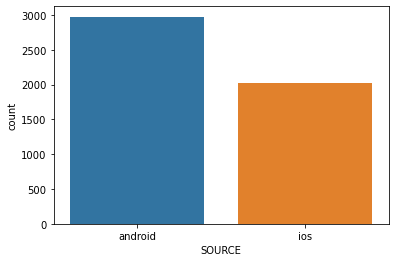

         SEX  Ratio
female  2621  52.42
male    2379  47.58
##########################################


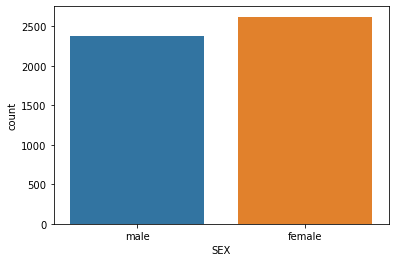

     COUNTRY  Ratio
usa     2065  41.30
bra     1496  29.92
deu      455   9.10
tur      451   9.02
fra      303   6.06
can      230   4.60
##########################################


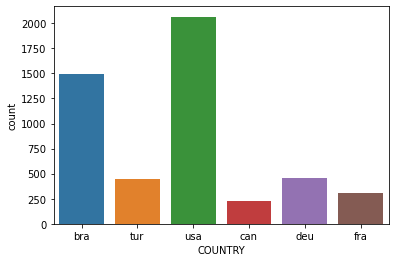

    PRICE  Ratio
29   1305  26.10
39   1260  25.20
49   1031  20.62
19    992  19.84
59    212   4.24
9     200   4.00
##########################################


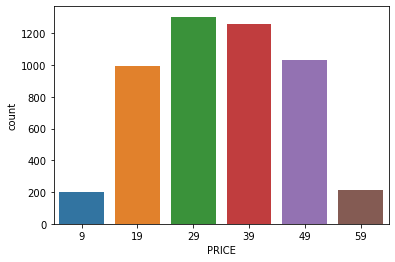

In [19]:
for col in cat_cols:
    cat_summary(df, col, plot=True)

In [27]:
def num_summary(dataframe, numerical_col, plot=False):

    if plot:
        dataframe[numerical_col].hist(bins=30)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()
        
  

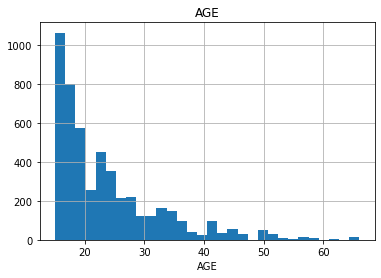

In [28]:
for col in num_cols:
    num_summary(df, col, plot=True)